## Prepare a prediction model for profit of 50_startups data.                                                 Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.                                                                                                                                                                                                                                                            R&D Spend -- Research and devolop spend in the past few years                            Administration -- spend on administration in the past few years                                Marketing Spend -- spend on Marketing in the past few years                                             State -- states from which data is collected                                                                           Profit  -- profit of each state in the past few years


# Import libraries

In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# import data

In [126]:
startup_data = pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Data Understanding

### Initial Analysis

In [127]:
startup_data.shape

(50, 5)

In [128]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [129]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## Assumptions Check

### Normality Test

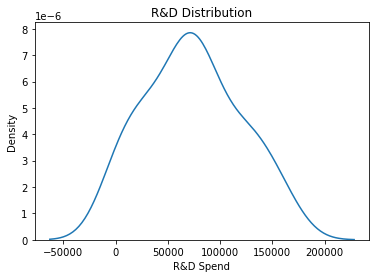

In [130]:
sns.distplot(a=startup_data['R&D Spend'], hist=False)
plt.title('R&D Distribution')
plt.show()

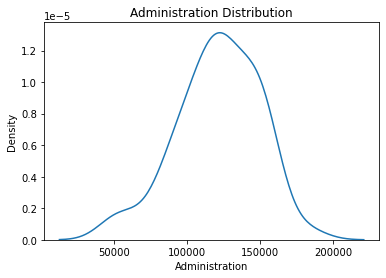

In [131]:
sns.distplot(a=startup_data['Administration'], hist=False)
plt.title('Administration Distribution')
plt.show()

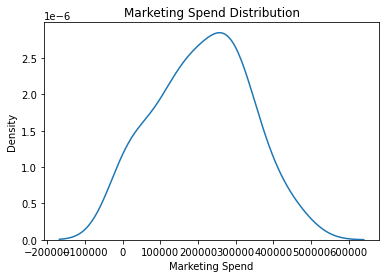

In [132]:
sns.distplot(a=startup_data['Marketing Spend'], hist=False)
plt.title('Marketing Spend Distribution')
plt.show()

### Linearity Test

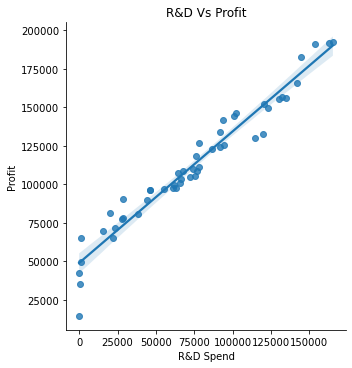

In [133]:
sns.lmplot(x='R&D Spend',y='Profit',data=startup_data)
plt.title('R&D Vs Profit')
plt.show()

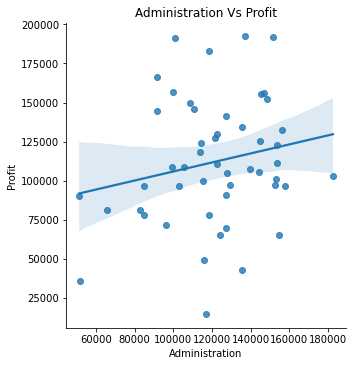

In [134]:
sns.lmplot(x='Administration',y='Profit',data=startup_data)
plt.title('Administration Vs Profit')
plt.show()

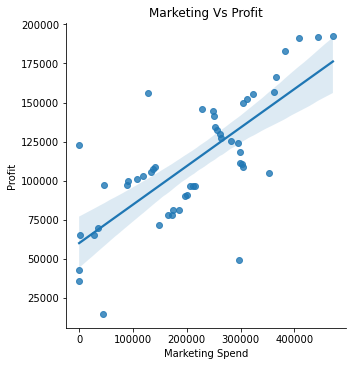

In [135]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startup_data)
plt.title('Marketing Vs Profit')
plt.show()

### Multicollinearity

In [136]:
correlat=startup_data.corr().round(2)
correlat

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


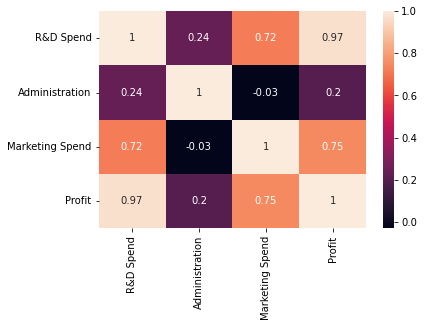

In [137]:
sns.heatmap(data=correlat, annot=True)
plt.show()

# Model Building

In [138]:
startup_data.rename(columns={'R&D Spend' : 'RD_Spend'}, inplace = True)
startup_data.rename(columns={'Marketing Spend' : 'Marketing_Spend'}, inplace=True)
startup_data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [139]:
x=startup_data.drop(labels=['State','Profit'], axis=1)
y=startup_data[['Profit']]

In [140]:
x.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [141]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [142]:
x.shape,y.shape

((50, 3), (50, 1))

# Model Training

In [143]:
model = ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        13:33:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
model1 = ols('Profit~RD_Spend',data=startup_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           3.50e-32
Time:                        13:33:00   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
model2 = ols('Profit~Administration',data=startup_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 22 Mar 2022   Prob (F-statistic):              0.162
Time:                        13:33:01   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
model3 = ols('Profit~Marketing_Spend',data=startup_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           4.38e-10
Time:                        13:33:01   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
model12 = ols('Profit~RD_Spend+Administration',data=startup_data).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           7.29e-31
Time:                        13:33:01   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_Spend           0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
model13 = ols('Profit~RD_Spend+Marketing_Spend',data=startup_data).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.16e-31
Time:                        13:33:01   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
model23 = ols('Profit~Administration+Marketing_Spend',data=startup_data).fit()
model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.50e-10
Time:                        13:33:01   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        13:33:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF 

In [151]:
RD = ols('RD_Spend~Administration+Marketing_Spend',data=startup_data).fit().rsquared  
vif_RD = 1/(1-RD)

ADMIN = ols('Administration~RD_Spend+Marketing_Spend',data=startup_data).fit().rsquared  
vif_ADMIN = 1/(1-ADMIN)

MARKETING = ols('Marketing_Spend~RD_Spend+Administration',data=startup_data).fit().rsquared  
vif_MARKETING = 1/(1-MARKETING) 


In [152]:
vif_df = {'Features':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD,vif_ADMIN,vif_MARKETING]}
Vif_frame = pd.DataFrame(vif_df)  
Vif_frame

,Features,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [153]:
model.summary()     #Best Fit Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        13:33:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

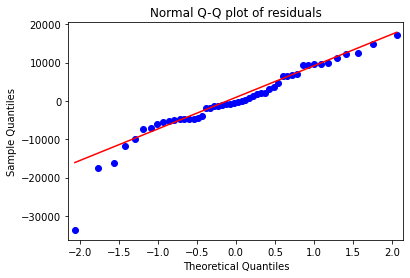

In [154]:
qqplot=smf.qqplot(model13.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

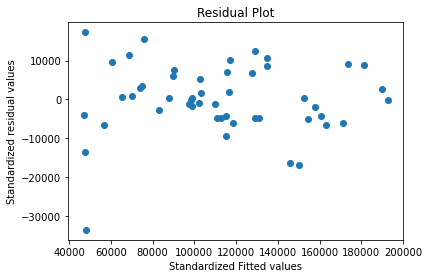

In [155]:
plt.scatter(model13.fittedvalues,model.resid)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residuals Vs Regressors

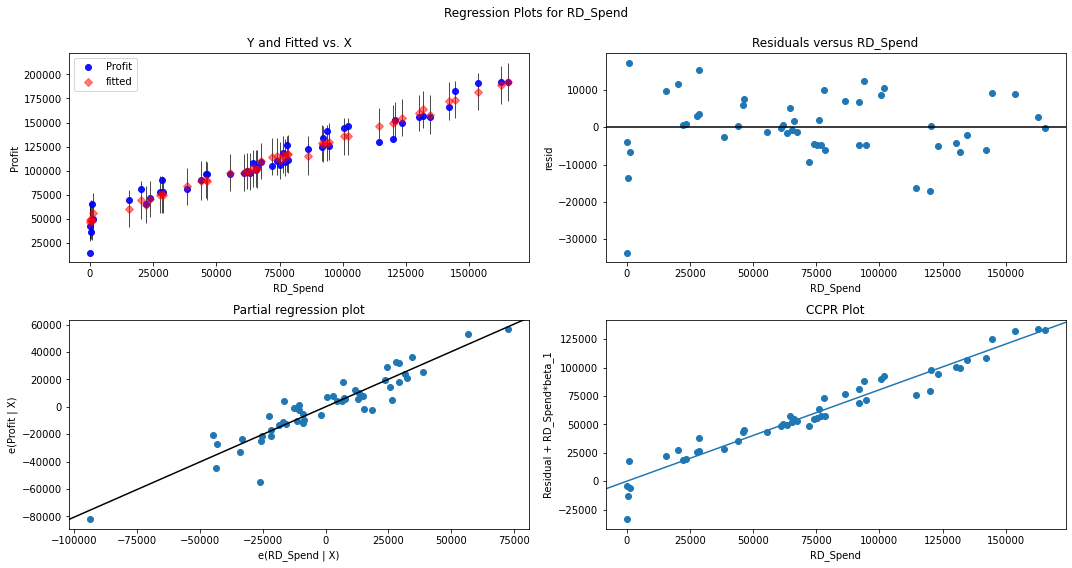

In [156]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

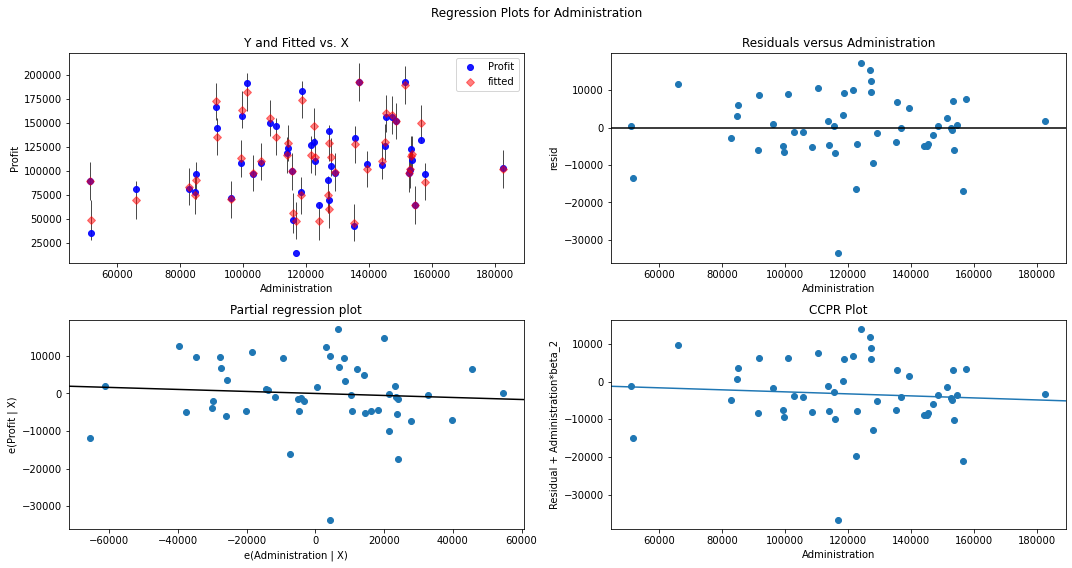

In [157]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

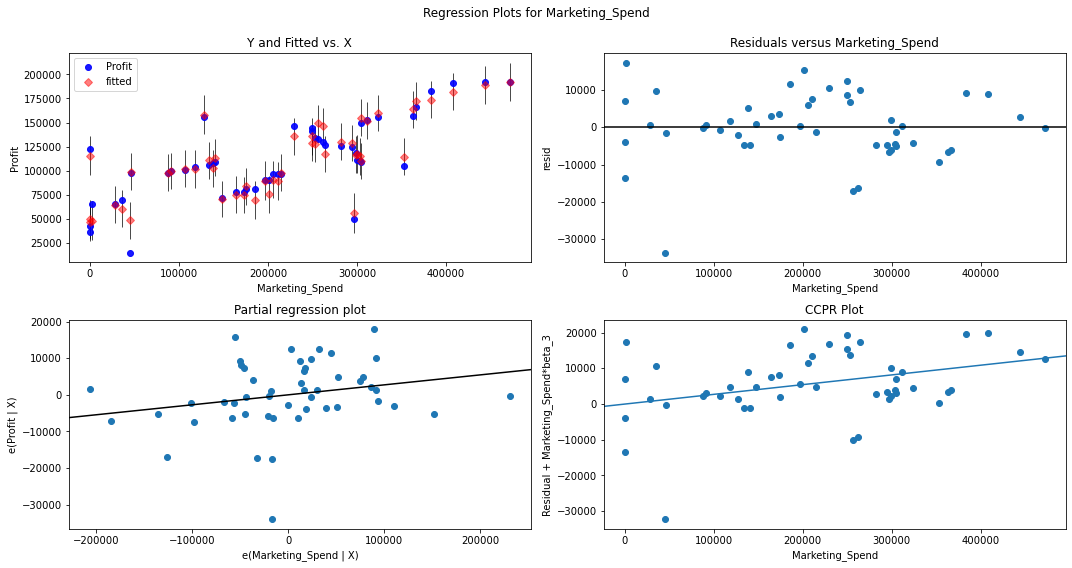

In [158]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

### Cooks Distance - Model Deletion Diagnostics

In [159]:
modelinf = model.get_influence()
(c, _) = modelinf.cooks_distance
(c, _)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

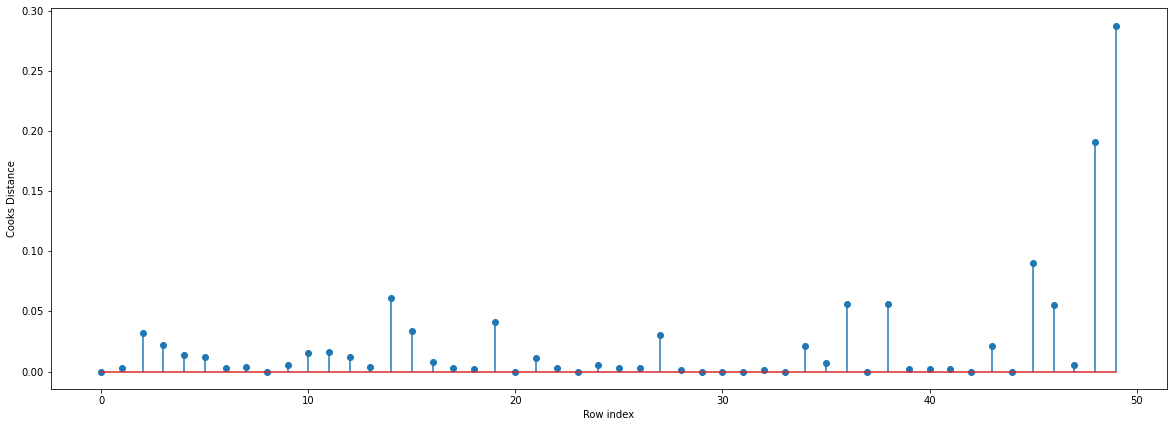

In [160]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(startup_data)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [161]:
startup_data=startup_data.drop(index=[48,49],axis=0).reset_index()


In [162]:
startup_data.shape

(48, 6)

In [163]:
FINAL = ols('Profit~RD_Spend+Administration+Marketing_Spend', startup_data).fit()

In [164]:
FINAL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.03e-31
Time:                        13:33:19   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [167]:
print(X_train.shape,
X_test.shape,y_train.shape,y_test.shape)

(40, 3) (10, 3) (40, 1) (10, 1)


In [168]:
y_train_pred = FINAL.predict(X_train)

In [169]:
train_resid = y_train_pred - y_train['Profit']

In [170]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

9325.416416672775

In [171]:
y_test_pred = FINAL.predict(X_test)

In [172]:
test_resid = y_test_pred - y_test['Profit']

In [173]:
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

8648.216314860616